# Multilayer perceptron (MLP)

The problem of recognizing handwritten digits is very popular and it is frequently used to measure the effectiveness of deep learning models. It focuses on a system's ability to digitize and understand handwritten texts from sources that include documents and images. Many effective techniques for recognizing handwritten texts have been developed in recent years. One of them is Optical Character Recognition (OCR), a technique that is mainly encountered in scanners.

Here we will use a network also known as Multi-Layer Perceptron (MLP). An MLP consists of an input layer, an output layer, and a number of (at least one) hidden layers. The figure below shows an MLP with an input layer (left), an output layer (right) and two intermediate, hidden layers.


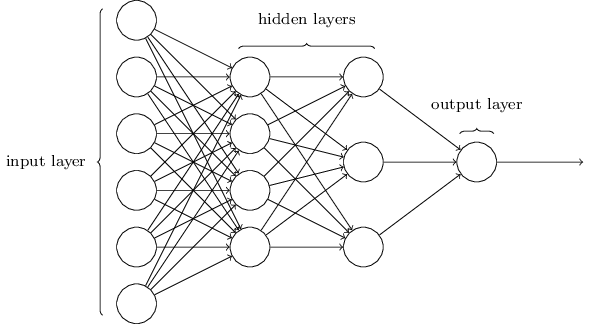

In [1]:
from IPython.display import Image
%matplotlib inline

Image(filename='mlp.png', width=500) 

## Architecture and properties

Each layer of an MLP contains a number of artificial neurons. For instance, the MLP of the above scheme includes:

* an input layer which contains 6 neurons (left),
* two intermediate hidden layers that comprise 4 and 3 neurons, respectively, and
* an output layer that contains a single neuron (right).

This type of artificial neural networks have the following properties:

* **Depth**: we call a neural network **deep** in case it includes at least 2 hidden layers. The number of hidden layers determines the depth of the model. The well-known deep learning models draw their name from this property.
* **Full connection**: Notice that the output of each neuron in a layer is connected to the input of **all** neurons in the next (right) layer. Consequently, in a fully-connected neural network:
 * the neurons in the $l$-th layer receive their input from the output **of all neurons** of the previous $(l-1)$-th layer, or equivalently,
 * the outputs **of all** neurons in the $l$-th layer are transferred to the input of **all** neurons of the $(l + 1)$-th layer.
* **Number of input neurons**: The input of a neural network includes all the feature vectors of the training examples of the dataset. Therefore, in the vast majority of deep learning problems, **the number of input neurons is identical to the number of components (i.e. the dimensionality, i.e. the number of features) of the training examples' vectors.**
* **Number of output neurons**: In classification problems, it is usually **equal to the number of possible classes** involved in the problem. Thus, in binary classification problems the output neurons are 2 (although only one is sufficient). If the possible classes are $N$, then we usually also have $N$ output neurons.
* **Number of hidden layers and neurons per hidden layer**: intuition, experience, testing. In some cases we group features as we move to the right (i.e. the output), while in others we break them down.


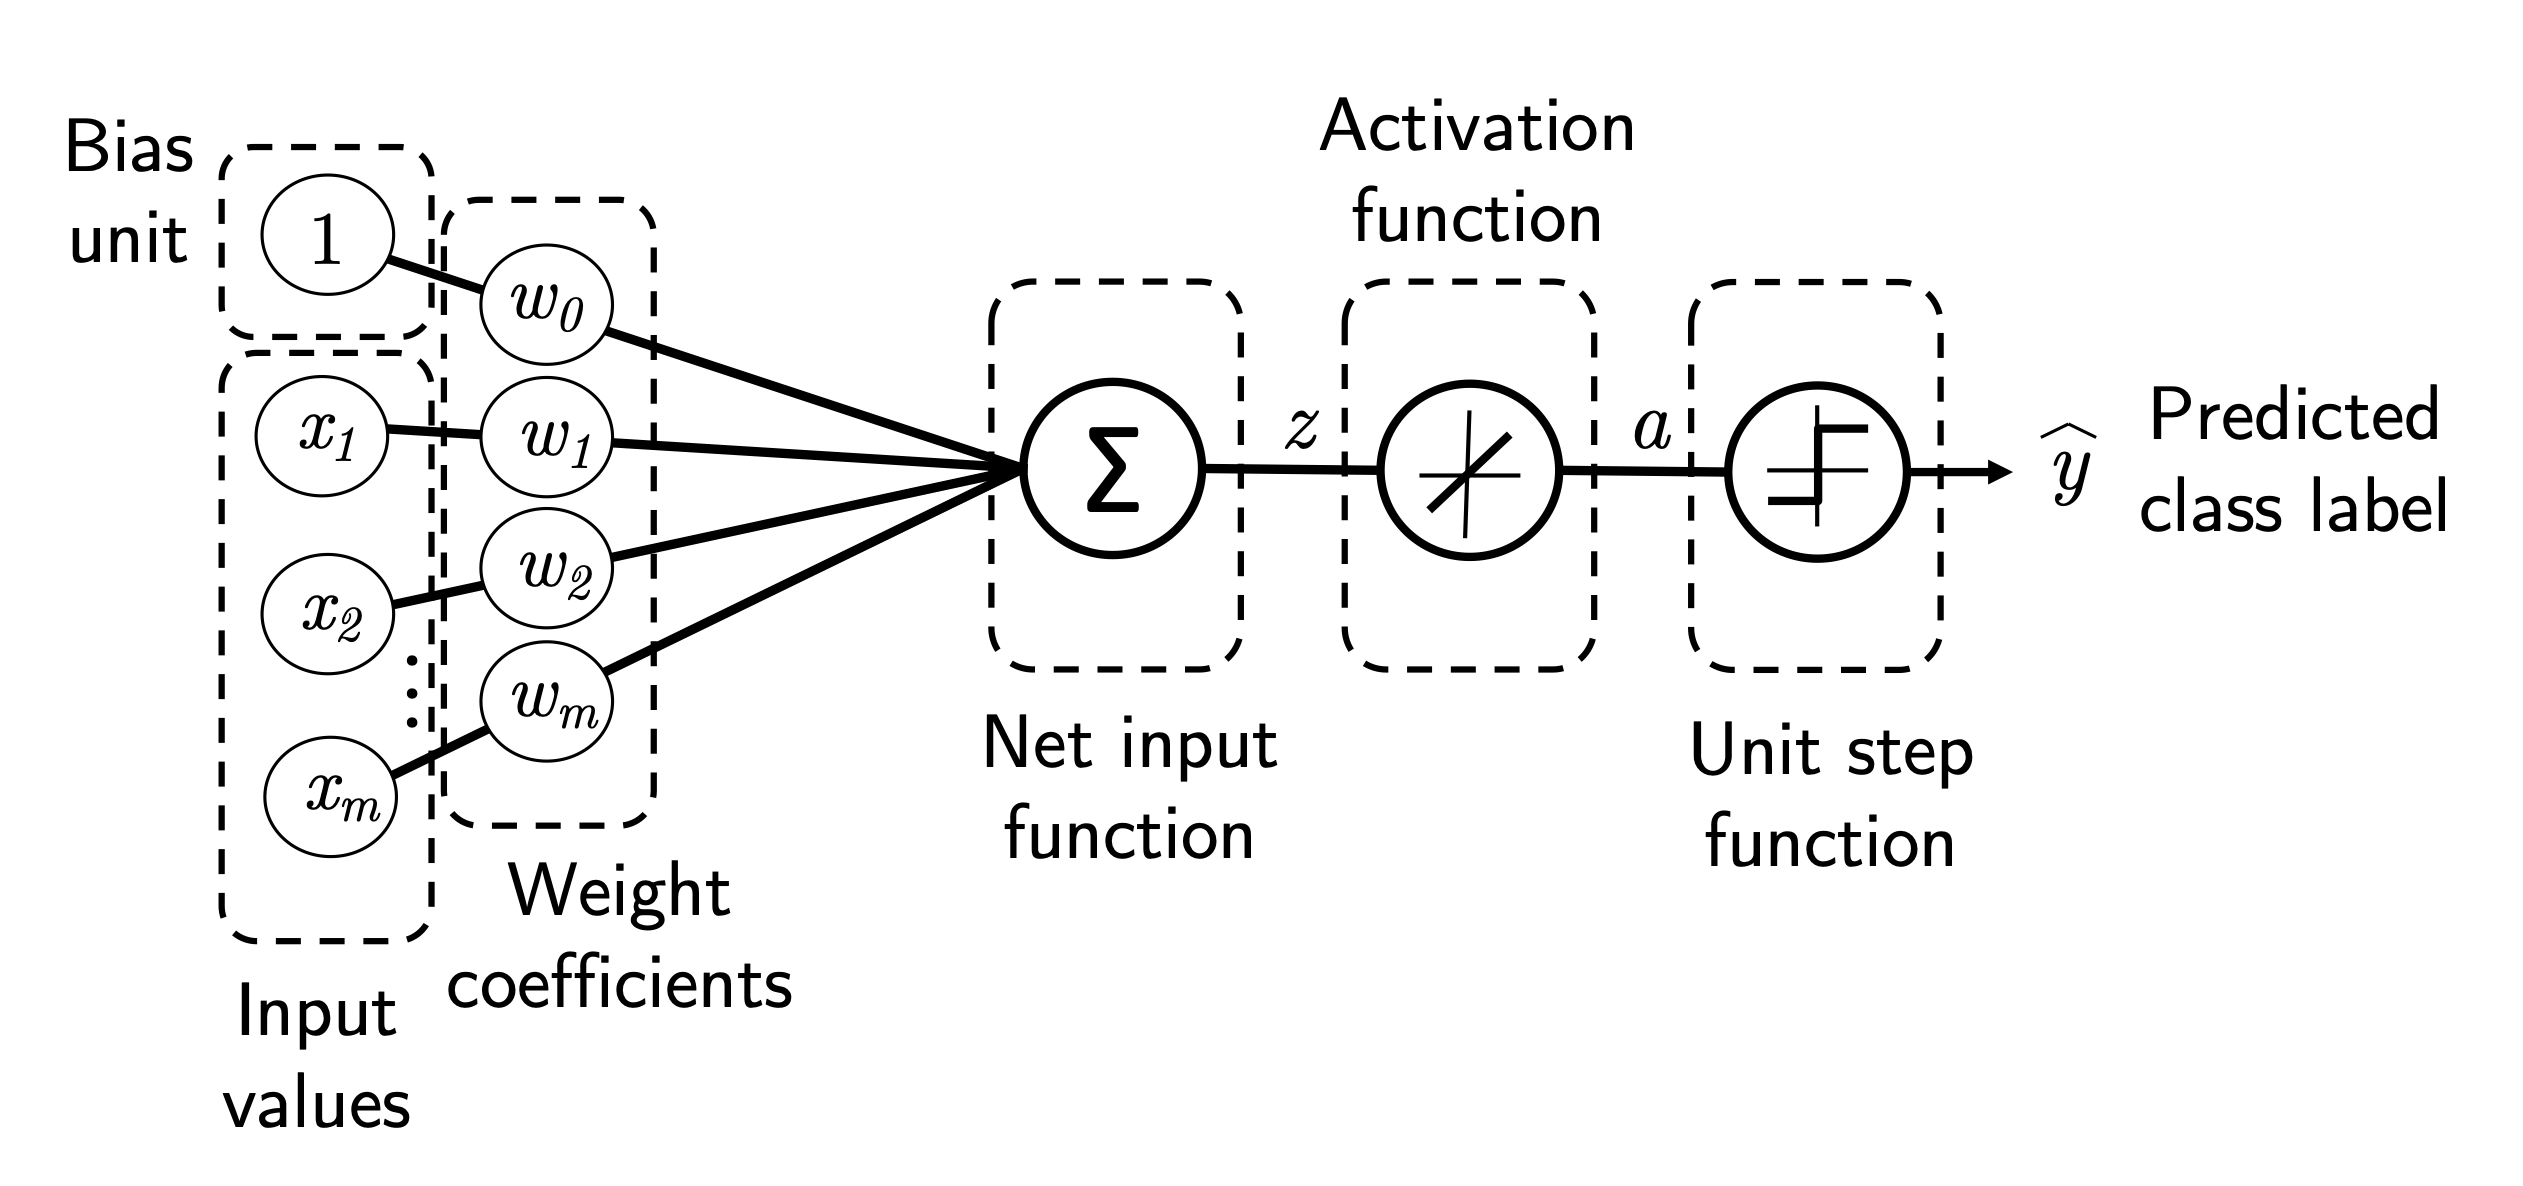

In [2]:
from IPython.display import Image
%matplotlib inline

Image(filename='mlp2.png', width=500)


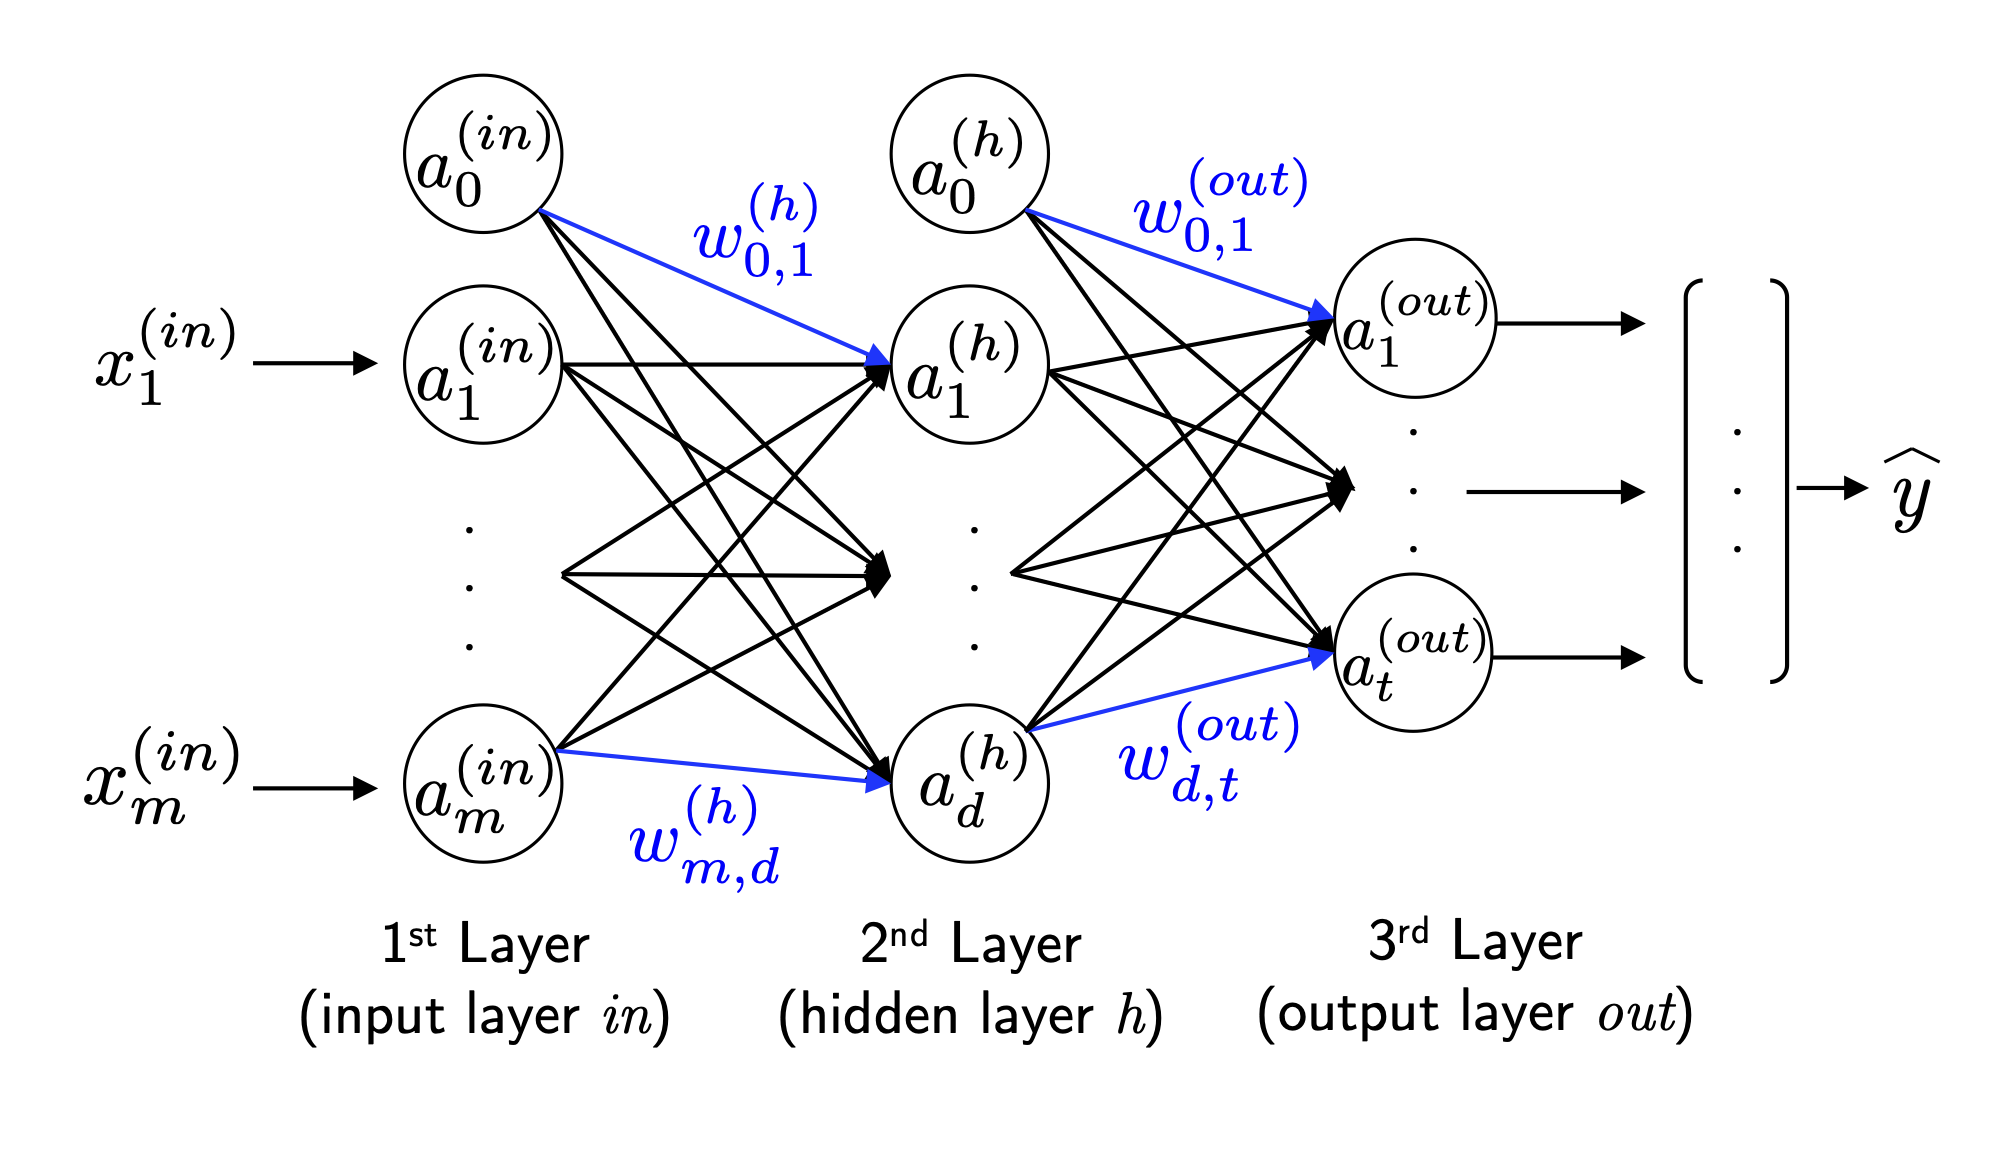

In [3]:
Image(filename='mlp3.png', width=500) 


The advantages of Multi-Layer Perceptron include the abilities to learn:

* non-linear models,
* models in real-time (also called **online learning**) by using the `partial_fit` method.

The disadvantages of Multi-Layer Perceptron are:

* The MLPs with multiple hidden layers (i.e. the deep MLPs) introduce non-convex cost functions with more than one local minima. Consequently, multiple different initializations of the weights may lead to models with different accuracies.
* The MLP requires the fine-tuning of several hyper-parameters such as the numbers of hidden neurons and layers, the maximum number of iterations, and so on.
* The MLPs are sensitive to feature scaling.


## The MNIST dataset

[MNIST](http://yann.lecun.com/exdb/mnist/) is a widespread dataset for recognizing handwritten digits. The MNIST database of handwritten digits has a training set of 60000 examples, and a test set of 10000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image of $28 \times 28$ pixels. Since there are 10 possible digits (from 0 to 9), there are 10 classes.

In this notebook the goal is to train a classification model by using the 60000 training images of the MNIST dataset. In the sequel, we shall test the performance of the model by employing the 10000 test images.


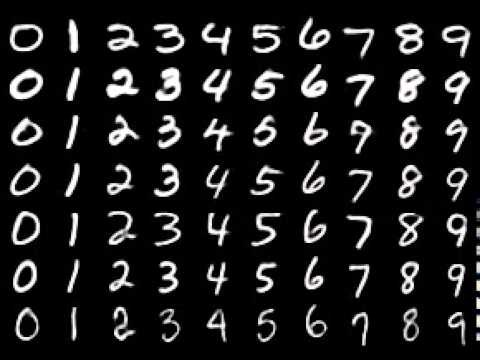

In [4]:
Image(filename='mnist.jpg', width=400)


The following code fetches the MNIST dataset and stores it into a folder in the local filesystem. In Windows, the data is typically stored in `X:\Users\<user>\scikit_learn_data\openml`.


In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)


A description of the dataset, provided by its authors (Yann LeCun, Corinna Cortes, Christopher J.C. Burges).


In [6]:
print(mnist.DESCR)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
# By default the data of the MNIST dataset is stored in a pandas dataframe
df_X = mnist.data

# Here we will convert the dataframe to a NumPy array to easily visualize data
X = df_X.to_numpy()

print("Shape of the input vectors: ", X.shape)
#print("First image: ", X[0])
print("Input vectors: ", X)


Shape of the input vectors:  (70000, 784)
Input vectors:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


The shape of `X` reveals that MNIST consists of 70000 samples (vectors), and each vector includes 784 features. Notice that the number of features (784) derives from the multiplication $28 \times 28$, that is, from the image dimensions. In other words, each $28 \times 28$ square image is flattened to a column vector with 784 components. Each vector component represents a pixel in the original $28 \times 28$ image.

Furthermore, each element receives a value within the range $[0,255]$ which denotes the "darkness" of the corresponding pixel. Therefore, the values $0$ and $255$ represent a white and a black pixel respectively.

In many cases, when we deal with image datasets, we usually need to scale the values of the components of the feature vectors either in the range $[0,1]$, or $[-1,1]$. 


In [8]:
# Scale X in the range [-1,1]
X_scaled = ((X / 255.) - .5) * 2

#print("Original vector of the first image:\n", X[0])
#print("Scaled vector of the first image:\n", X_scaled[0])


In [9]:
# The target variables are converted to integers (the original dtype is 'category')
y = mnist.target.astype(int)
print(y)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int32


### Dataset visualizations

The following block of code illustrates the first digit from each class.

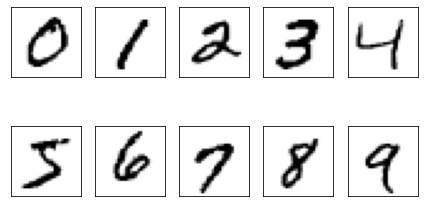

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

plt.show()


This one depicts 25 different versions of "4":

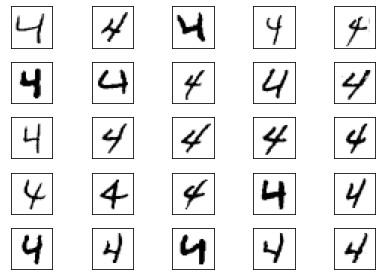

In [11]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()

for i in range(25):
    img = X[y == 4][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

plt.show()


## Training an MLP classifier

The [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) class of  scikit-learn implements a fully connected feed-forward Multilayer perceptron (MLP). The constructor of the class accepts the following arguments:

* `activation`: The activation function of the neurons of the hidden layers. It may receive the following values:
  * `identity`: $\sigma(x)=x$
  * `logistic`: $\sigma(x)=1 / (1 + e^{-x})$
  * `tanh`: $\sigma(x) = \tanh(x)$
  * `relu`: $\sigma(x) = \max(0, x)$
* `hidden_layer_sizes`: A tuple that determines the architecture of the neural network. The number of elements in the tuple denote the number of the hidden layers of the network. Moreover, the $i$-th element of the tuple represents the number of neurons in the $i$-th hidden layer.
* `solver`: An optimization method (also called solver) for the cost function. This parameter may receive the following values:
  * `lbfgs`: an optimizer in the family of quasi-Newton methods.
  * `sgd`: stochastic gradient descent (SGD).
  * `adam`: optimized SGD.
* `alpha`: L2 penalty (regularization term) parameter.
* `max_iter`: Maximum number of iterations. The solver iterates until convergence (determined by `tol`) or this number of iterations. For stochastic solvers (`sgd`, `adam`), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
* `tol`: Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.
* `learning_rate`: Learning rate schedule for weight updates. Only used when `solver=sgd`.

In the following example we train a fully connected feed-forward neural network with three hidden layers. The first one includes 100 neurons, the second one includes 50 neurons, whereas the third one includes 30 neurons. As mentioned earlier, the architecture is determined by the `hidden_layer_sizes` hyper-parameter.


In [12]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import time

# Split the dataset into a training set (60000 samples) and a test set (10000 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=123, stratify=y)

# Topology: 3 hidden layers with 100, 50, and 30 neurons respectively
mlp = MLPClassifier(activation = 'relu', hidden_layer_sizes = (100, 50, 30), alpha = 0.3)

# Train the MLP as usually
t0 = time.time()
mlp.fit(X_train, y_train)
t1 = time.time()


## Evaluation

The evaluation is performed similarly to the other classifiers. We invoke the `predict` method to get the model's predictions and then we employ several evaluation metrics.


In [13]:
# Predict the values of the digits in the test set
MLP_Pred = mlp.predict(X_test)

# We measure the values of accuracy and balanced accuracy
ACC = accuracy_score(y_test, MLP_Pred)
BACC = balanced_accuracy_score(y_test, MLP_Pred)
F1 = f1_score(y_test, MLP_Pred, average='weighted')
MSE = mean_squared_error(y_test, MLP_Pred)

results = []
results.append(["Multilayer Perceptron", ACC, BACC, F1, MSE, t1 - t0 ])

print("===================================================================")
print("MULTILAYER PERCEPTRON (MLP, FEED FORWARD NEURAL NETWORK)")
print("===================================================================")
print("\tTraining Time: ", t1 - t0)
print("\tAccuracy: ", ACC)
print("\tBalanced Accuracy: ", BACC)
print("\tF1 Score: ", F1)
print("\tMean Squared Error: ", MSE)
print(f"\tClassification report:\n"
      f"{classification_report(y_test, MLP_Pred)}")
print("===================================================================\n\n")


MULTILAYER PERCEPTRON (MLP, FEED FORWARD NEURAL NETWORK)
	Training Time:  76.91499996185303
	Accuracy:  0.9733
	Balanced Accuracy:  0.9729894760655041
	F1 Score:  0.9733230983108915
	Mean Squared Error:  0.4823
	Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       986
           1       0.99      0.99      0.99      1125
           2       0.98      0.97      0.97       999
           3       0.97      0.96      0.97      1020
           4       0.98      0.97      0.97       975
           5       0.97      0.97      0.97       902
           6       0.98      0.97      0.98       982
           7       0.96      0.98      0.97      1042
           8       0.94      0.98      0.96       975
           9       0.96      0.97      0.96       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000





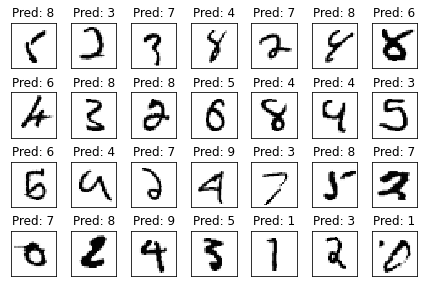

In [14]:
misclassified_images = X_test[y_test != MLP_Pred][:28]
misclassified_labels = MLP_Pred[y_test != MLP_Pred][:28]

fig, ax = plt.subplots(nrows=4, ncols=7, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(28):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title("Pred: " + (str)(misclassified_labels[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


## Comparison with other classifiers

Now let us compare the performance of MLP with the performance of some other classifiers. More specifically, we shall experiment with the following classification algorithms:

* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
* [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron


### Logistic Regression


In [16]:
# Create a Logistic Regression Model
LRC_Model = LogisticRegression()

# Train the model
t0 = time.time()
LRC_Model.fit(X_train, y_train)
t1 = time.time()

# Test the model. LRC_Pred contains the model's predicted values.
LRC_Pred = LRC_Model.predict(X_test)

# Compare the predicted with the real target variables
ACC = accuracy_score(y_test, LRC_Pred)
BACC = balanced_accuracy_score(y_test, LRC_Pred)
F1 = f1_score(y_test, LRC_Pred, average='weighted')
MSE = mean_squared_error(y_test, LRC_Pred)

results.append(["Logistic Regression", ACC, BACC, F1, MSE, t1 - t0 ])


C:\Users\Leo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Perceptron


In [17]:
# Create a Perceptron Model
PPNC_Model = Perceptron()

# Train the model
t0 = time.time()
PPNC_Model.fit(X_train, y_train)
t1 = time.time()

# Test the model. PPNC_Pred contains the model's predicted values.
PPNC_Pred = PPNC_Model.predict(X_test)

# Compare the predicted with the real target variables
ACC = accuracy_score(y_test, PPNC_Pred)
BACC = balanced_accuracy_score(y_test, PPNC_Pred)
F1 = f1_score(y_test, PPNC_Pred, average='weighted')
MSE = mean_squared_error(y_test, PPNC_Pred)

results.append(["Perceptron", ACC, BACC, F1, MSE, t1 - t0 ])


### Decision Tree Classifier

In [18]:
# Create a Decistion Tree Classification Model
DTC_Model = DecisionTreeClassifier(max_depth=16, random_state=0)

# Train the model
t0 = time.time()
DTC_Model.fit(X_train, y_train)
t1 = time.time()

# Test the model. DTC_Pred contains the model's predicted values.
DTC_Pred = DTC_Model.predict(X_test)

# Compare the predicted with the real target variables
ACC = accuracy_score(y_test, DTC_Pred)
BACC = balanced_accuracy_score(y_test, DTC_Pred)
F1 = f1_score(y_test, DTC_Pred, average='weighted')
MSE = mean_squared_error(y_test, DTC_Pred)

results.append(["Decision Tree Classifier", ACC, BACC, F1, MSE, t1 - t0 ])


### Random Forest Classifier


In [19]:
# Create a Random Forest Classification Model
RFC_Model = RandomForestClassifier(max_depth=16, random_state=0)

# Train the model
t0 = time.time()
RFC_Model.fit(X_train, y_train)
t1 = time.time()

# Test the model. RFC_Pred contains the model's predicted values.
RFC_Pred = RFC_Model.predict(X_test)

# Compare the predicted with the real target variables
ACC = accuracy_score(y_test, RFC_Pred)
BACC = balanced_accuracy_score(y_test, RFC_Pred)
F1 = f1_score(y_test, RFC_Pred, average='weighted')
MSE = mean_squared_error(y_test, RFC_Pred)

results.append(["Random Forest Classifier", ACC, BACC, F1, MSE, t1 - t0 ])


### Results


In [20]:
import pandas as pd

df_results = pd.DataFrame(results,
                columns=["Classifier", "Accuracy", "Balanced Accuracy", "F1 Score", "Mean Squared Error", "Training Time"])

display(df_results)


Classifier  Accuracy  Balanced Accuracy  F1 Score  \
0     Multilayer Perceptron    0.9733           0.972989  0.973323   
1       Logistic Regression    0.9209           0.919648  0.920798   
2                Perceptron    0.8435           0.840860  0.834875   
3  Decision Tree Classifier    0.8782           0.876549  0.877988   
4  Random Forest Classifier    0.9648           0.964522  0.964782   

   Mean Squared Error  Training Time  
0              0.4823         76.915  
1              1.3372          8.147  
2              2.3343          9.539  
3              1.9841         11.454  
4              0.6168         29.411

In [21]:
print("===================================================================")
print("LOGISTIC REGRESSION")
print("===================================================================")
print(f"Classification report:\n"
      f"{classification_report(y_test, LRC_Pred)}")
print("===================================================================\n\n")


print("===================================================================")
print("PERCEPTRON")
print("===================================================================")
print(f"Classification report:\n"
      f"{classification_report(y_test, PPNC_Pred)}")
print("===================================================================\n\n")


print("===================================================================")
print("DECISION TREE (CLASSIFIER)")
print("===================================================================")
print(f"Classification report:\n"
      f"{classification_report(y_test, DTC_Pred)}")
print("===================================================================\n\n")


print("===================================================================")
print("RANDOM FOREST (CLASSIFIER)")
print("===================================================================")
print(f"Classification report:\n"
      f"{classification_report(y_test, RFC_Pred)}")
print("===================================================================")


LOGISTIC REGRESSION
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       986
           1       0.97      0.98      0.97      1125
           2       0.92      0.90      0.91       999
           3       0.89      0.90      0.89      1020
           4       0.93      0.92      0.93       975
           5       0.89      0.86      0.88       902
           6       0.95      0.95      0.95       982
           7       0.93      0.93      0.93      1042
           8       0.88      0.89      0.88       975
           9       0.89      0.91      0.90       994

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



PERCEPTRON
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       986
           1       0.97      0.97      0.97      1125